In [1]:
%matplotlib inline
# We need the line above to embed plots in the notebook

# Exercise 02: Word Clouding using Basic Data Types

In this exercise you are going to make a Word Cloud: a collage that representes how often a word is used in a body of text by how large the word appears in the image.  With the exception of the code included in this notebook skelenton, you should only need to use the basic Python data types (strings, lists, sets, and dictionaries), if-statements, and for-loops to complete this project.


## Overview
Input: the text of *Frankenstein*

Final Data Output: A dictionary with the keys being uncommon words from the book paired to the frequency of the word 

Final Visual: A word cloud of these uncommon words


## Objectives
+ Learn to install packages using Anaconda Navigator
+ Explore using a Python notebook
+ Demonstrate your undertanding of Python built-in data types: sets, lists, dictionaries, strings


## Before you begin
Make sure you have installed the wordcloud package from conda-forge.

**Remember to execute the cells in order to run the code in them.  If you want to start over, you can restart the Kernel from the menu**

**Also add cells and explore the output along the way.  Development and analysis is an iterative process.**

In [2]:
# Here are our package imports
# We'll discuss them later

# Needed for our HTTP requests
import urllib  

# Needed to do the plotting
from matplotlib import pyplot as plt  

# I want to make the figure larger
plt.rcParams['figure.figsize'] = (40,30) 

# Our third-party WordCloud library
from wordcloud import WordCloud

## Part 0: Downloading a book

For this exercise we are going to download the book *Frankenstein* by Mary Shelly. The cell below does this for you.  Run this cell to download the book as a single string called `book_text`.


In [3]:
import urllib
url = 'http://www.cse.msu.edu/~ruppmatt/itm891/frankenstein.txt'
with urllib.request.urlopen(url) as response:
    book_text = response.read().decode('utf-8')  # This is a string that contains the book

In [4]:
book_text

'\ufeff\r\nProject Gutenberg\'s Frankenstein, by Mary Wollstonecraft (Godwin) Shelley\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.net\r\n\r\n\r\nTitle: Frankenstein\r\n       or The Modern Prometheus\r\n\r\nAuthor: Mary Wollstonecraft (Godwin) Shelley\r\n\r\nRelease Date: June 17, 2008 [EBook #84]\r\nLast updated: January 13, 2018\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK FRANKENSTEIN ***\r\n\r\n\r\n\r\n\r\nProduced by Judith Boss, Christy Phillips, Lynn Hanninen,\r\nand David Meltzer. HTML version by Al Haines.\r\nFurther corrections by Menno de Leeuw.\r\n\r\n\r\n\r\nFrankenstein;\r\n\r\n\r\nor, the Modern Prometheus\r\n\r\n\r\n\r\n\r\nby\r\n\r\n\r\nMary Wollstonecraft (Godwin) Shelley\r\n\r\n\r\n\r\n\r\

## Part 1: Preprocessing the text of the book

### Overview

Input: A string containing the text of the book (you should have executed the code cells above before you execute any cells below)

Output: A string of the text of the book that contains capitalized words and spaces *only*.


### Description

The string `book_text` created in the Part 0 contains numbers, punctuation, and other characters that we don't want to include in our final word cloud.  Before we go any further, let's remove those characters.  While we're at it, let's rid ourselves of lowercase letters so that the words at beginning of sentences and proper nouns aren't counted differently than words that are all lowercase.

Consider the following questions when solving this sub-problem:
* We want to handle just capital letters.  Is there a way to make a new string that contains an uppercase version of the `book_text` string?  (Use Google!)
    + Once we've converted the string to uppercase, we will only work with that string from now on, not the original that contained both upper and lowercase letters.
* How do you know what characters are in the text of the book?
    + Which data structure deals with keeping a collection of unique objects?
    + What happens when you create this data structure with a string as the only parameter?  Play with that idea in the notebook.
    + Create an collection (list, set, dict pick one) that contains the unqiue characters in the capitalized version of the text.
* If you have a collection of unique characters in the book and a collection of English capitalized letters and space, how would you find the characters you would like to replace?
    + Look at the documentation for this collection datatype that contains unique elements.  Is there a way to subtract one collection from another?  The result should give you all the characters you need to replace.
* Once you've gotten a collection of characters you want to remove, how do you remove them?
    + Try replacing them with spaces.  Is there a method you can call on a string to do this?  (Google it!)
    + Make a loop that will iterate over the characters you would like to remove and replace them with spaces in the uppercase book string.  This will be the output for this part of the exercise.

To answer the questions above, consider the strengths of the basic data types we covered today and the methods you may call on them.  Google the documentation!

In [5]:
# Place your solution to the subproblem here

upper_book_text = book_text.upper()
book_characters = set(book_text)
chars_to_keep = set(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
replace_book_characters = book_characters - chars_to_keep
for char in replace_book_characters:
    upper_book_text = upper_book_text.replace(char, ' ')
    
upper_book_text

'   PROJECT GUTENBERG S FRANKENSTEIN  BY MARY WOLLSTONECRAFT  GODWIN  SHELLEY    THIS EBOOK IS FOR THE USE OF ANYONE ANYWHERE AT NO COST AND WITH  ALMOST NO RESTRICTIONS WHATSOEVER   YOU MAY COPY IT  GIVE IT AWAY OR  RE USE IT UNDER THE TERMS OF THE PROJECT GUTENBERG LICENSE INCLUDED  WITH THIS EBOOK OR ONLINE AT WWW GUTENBERG NET      TITLE  FRANKENSTEIN         OR THE MODERN PROMETHEUS    AUTHOR  MARY WOLLSTONECRAFT  GODWIN  SHELLEY    RELEASE DATE  JUNE           EBOOK       LAST UPDATED  JANUARY             LANGUAGE  ENGLISH    CHARACTER SET ENCODING  UTF          START OF THIS PROJECT GUTENBERG EBOOK FRANKENSTEIN              PRODUCED BY JUDITH BOSS  CHRISTY PHILLIPS  LYNN HANNINEN   AND DAVID MELTZER  HTML VERSION BY AL HAINES   FURTHER CORRECTIONS BY MENNO DE LEEUW         FRANKENSTEIN       OR  THE MODERN PROMETHEUS          BY      MARY WOLLSTONECRAFT  GODWIN  SHELLEY              CONTENTS          LETTER      LETTER      LETTER      LETTER      CHAPTER      CHAPTER      CHAPT

## Part 2: Creating collection of unique words in the book

### Overview

Input: A string containing the capitalized text of the book and whitespace

Output: A collection of unique words in the book


### Description

In the next section we are going to remove common words from the text.  Before we do that, we need to know what words are used in the book.

+ We're working on the uppercase string version of the book with non-English and non-space characters removed.
+ Is there some way to split the string into words?  Google it.
+ Once we have a collection of all words in the book, is there a way to convert that to a collection of *unique* words in the book?  What data structure would you use?  What happens if you initialize that data structure with a list of words?

In [6]:
# Place your solution to the subproblem here

upper_book_words = upper_book_text.split()
upper_book_words_unique = list(set(upper_book_words))
upper_book_words_unique

['MISFORTUNE',
 'RECOMMENCING',
 'SIMPLE',
 'DOUBTLESS',
 'ENCOUNTER',
 'STREAM',
 'TORMENT',
 'HEALED',
 'DR',
 'TWELVE',
 'LADIES',
 'BEST',
 'WISEST',
 'LUXURIANCES',
 'TRANSCRIPTION',
 'INJURY',
 'DESTROYER',
 'PERVADED',
 'GLARING',
 'SPECKED',
 'PG',
 'UNMINGLED',
 'HEAVILY',
 'NOTED',
 'CONTRACT',
 'YIELDED',
 'PHILLIPS',
 'AGILE',
 'ACCEPTED',
 'GRATIFIED',
 'UNEASINESS',
 'FORSAKES',
 'WERT',
 'WRONGFULLY',
 'DREADED',
 'TRIUMPHED',
 'SMALL',
 'FIVE',
 'BLACKEST',
 'GLOOM',
 'IDEAL',
 'ARREST',
 'ADMISSION',
 'FACTS',
 'FORM',
 'OPINIONS',
 'SERVE',
 'DISPOSED',
 'SLENDERLY',
 'FORCES',
 'WATERFALLS',
 'SHALL',
 'STRANGE',
 'PITIED',
 'BILL',
 'CHAMBER',
 'TURNING',
 'REFLECTION',
 'PEACEABLY',
 'ENDEARED',
 'OBSCURE',
 'FALSEHOOD',
 'CHILDREN',
 'ALARMED',
 'GRANT',
 'UNWORTHINESS',
 'MONEY',
 'STEALTH',
 'CLASSIFICATIONS',
 'IDENTIFICATION',
 'ASSEVERATIONS',
 'OPAQUE',
 'CULTIVATING',
 'IDLENESS',
 'AMUSED',
 'TEMPTATION',
 'PARTICULARS',
 'PAUSES',
 'SELECTED',
 'LAWS',
 '

## Part 3: Getting common words

### Overview

Input: From this notebook, nothing.

Output: We want a unique collection of common words to use in the next step to remove them from the text.


### Description

Examine the code in the Part 0 section.  There is a file that contains common words located at the following URL:
    http://www.cse.msu.edu/~ruppmatt/itm891/common_words.txt
    
1. Copy and paste the code from Part 0 to create a new string of common words.
2. Make a collection of the unique words from the string of common words.

Note: Examine what that file contains.  Is it in the right format for what we need?  Is it upper or lowercase?  Examine the output of each step in the process for solving this step as you go along.

In [7]:
# Copy code from Part 0 here and extend it as described above

url_commonwords = 'http://www.cse.msu.edu/~ruppmatt/itm891/common_words.txt'
with urllib.request.urlopen(url_commonwords) as response:
    common_words = response.read().decode('utf-8')  # This is a string that contains the book
common_words_upper = common_words.upper().split("\n")
common_words_upper

['THE',
 'OF',
 'TO',
 'AND',
 'A',
 'IN',
 'IS',
 'IT',
 'YOU',
 'THAT',
 'HE',
 'WAS',
 'FOR',
 'ON',
 'ARE',
 'WITH',
 'AS',
 'I',
 'HIS',
 'THEY',
 'BE',
 'AT',
 'ONE',
 'HAVE',
 'THIS',
 'FROM',
 'OR',
 'HAD',
 'BY',
 'NOT',
 'WORD',
 'BUT',
 'WHAT',
 'SOME',
 'WE',
 'CAN',
 'OUT',
 'OTHER',
 'WERE',
 'ALL',
 'THERE',
 'WHEN',
 'UP',
 'USE',
 'YOUR',
 'HOW',
 'SAID',
 'AN',
 'EACH',
 'SHE',
 'WHICH',
 'DO',
 'THEIR',
 'TIME',
 'IF',
 'WILL',
 'WAY',
 'ABOUT',
 'MANY',
 'THEN',
 'THEM',
 'WRITE',
 'WOULD',
 'LIKE',
 'SO',
 'THESE',
 'HER',
 'LONG',
 'MAKE',
 'THING',
 'SEE',
 'HIM',
 'TWO',
 'HAS',
 'LOOK',
 'MORE',
 'DAY',
 'COULD',
 'GO',
 'COME',
 'DID',
 'NUMBER',
 'SOUND',
 'NO',
 'MOST',
 'PEOPLE',
 'MY',
 'OVER',
 'KNOW',
 'WATER',
 'THAN',
 'CALL',
 'FIRST',
 'WHO',
 'MAY',
 'DOWN',
 'SIDE',
 'BEEN',
 'NOW',
 'FIND',
 'ANY',
 'NEW',
 'WORK',
 'PART',
 'TAKE',
 'GET',
 'PLACE',
 'MADE',
 'LIVE',
 'WHERE',
 'AFTER',
 'BACK',
 'LITTLE',
 'ONLY',
 'ROUND',
 'MAN',
 'YEAR',
 'CA

## Part 4: Removing common words from the text

### Overview

Input: 
* The collection of unique words in the text from Part 2
* The collection of common words downloaded in Part 3

Output: A collection of words in the book that aren't common


### Description

Using the unique collection of words Part 2 (in the book) and Part 3 (common words overall) you should be able to remove the common words from the collection of unique words in the book.

+ If both of these are the same data type that represents a collection of unique objects, what operator would you use to get just the uncommon words in the book?

In [8]:
# Place your solution to the subproblem here
upper_book_words_uncommon = list(set(upper_book_words_unique) - set(common_words_upper))
upper_book_words_uncommon

['MISFORTUNE',
 'RECOMMENCING',
 'AVAILED',
 'DOUBTLESS',
 'ENCOUNTER',
 'ALLEVIATED',
 'TREASURES',
 'FATALITY',
 'TORMENT',
 'HEALED',
 'DR',
 'TWELVE',
 'LADIES',
 'WISEST',
 'TRANSCRIPTION',
 'LUXURIANCES',
 'INCOMPLETE',
 'INJURY',
 'DESTROYER',
 'PERVADED',
 'VANISHED',
 'WORKS',
 'GLARING',
 'SPECKED',
 'DARED',
 'AMERICA',
 'PG',
 'UNMINGLED',
 'HEAVILY',
 'LIVES',
 'NOTED',
 'CONTRACT',
 'LIABILITY',
 'COTTAGE',
 'GLOW',
 'YIELDED',
 'PHILLIPS',
 'AGILE',
 'ACCEPTED',
 'GRATIFIED',
 'UNEASINESS',
 'FORSAKES',
 'WERT',
 'LAMENTATIONS',
 'WRONGFULLY',
 'INCESSANTLY',
 'RELATED',
 'TRUTH',
 'DREADED',
 'PACKED',
 'ORKNEY',
 'SCALING',
 'TRIUMPHED',
 'BLACKEST',
 'UNUSUAL',
 'FIRING',
 'METHODS',
 'DARKNESS',
 'GLOOM',
 'IDEAL',
 'ARREST',
 'ADMISSION',
 'FACTS',
 'OPINIONS',
 'NEGLIGENTLY',
 'DISPOSED',
 'FANCIED',
 'QUICKLY',
 'BROWS',
 'ACCUMULATION',
 'SLENDERLY',
 'AWAKE',
 'FORCES',
 'VICAR',
 'VIEWS',
 'WATERFALLS',
 'CONCLUSION',
 'PITIED',
 'BILL',
 'PERDITION',
 'CHAMBER

## Part 5: Getting the word frequency of uncommon words from the text

### Overview

Input: 
* The cleaned book text from Part 1
* The uncommon and unique words from Part 4

Output:  A dictionary where the keys are the uncommon and unique words in the book and the value is the count of those words.  We also want small-length words removed.

There are a number of things we need to consider:
+ We're going to begin again with the santized book text from Part 1.  We want a collection of words from that santized text, but this time a collection of all words, not just the unique words.
+ We have a unique collection of uncommon words in the book from Part 4.
+ Somehow we need to *iterate* over the list of uncommon words in the book and
    - count the number of times those words appear
    - store that count in a manner that associates them with the word
    - ignore small-length words (we'll say less than 3 characters)
    - since we need to iterate, we'll have to use a loop
+ Is there a way to count the number of times a word appears in a non-unique collection of words?  (Google it!)
+ We need a data structure to *map* a word to its count.
    - is there a data structure that does a mapping from a key to a value?
    - how do you associate a word (key) with its count (value)
    - (this data structure might be mentioned in the output documentation above)

Imagine that we had a list of words in a variable called `words_in_book` that contains a list of all words in the book.  If we wanted to iterate over it, we could:

    for word in words_in_book:
        if len(word) < 3:
            continue
        else:
            pass # Here you would write the code to count the
                 # number of tiem words would appear and store
                 # it in a dictionary.  pass just means we don't
                 # have any code yet for the else block

In [14]:
# Place your solution to the subproblem here
word_freq = {}
for word in upper_book_words_uncommon:
    if len(word) < 3:
        continue
    else:
        word_freq[word] = upper_book_text.count(word)
word_freq

{'MISFORTUNE': 33,
 'RECOMMENCING': 1,
 'AVAILED': 1,
 'DOUBTLESS': 8,
 'ENCOUNTER': 8,
 'ALLEVIATED': 1,
 'TREASURES': 3,
 'FATALITY': 2,
 'TORMENT': 15,
 'HEALED': 1,
 'TWELVE': 1,
 'LADIES': 1,
 'WISEST': 1,
 'TRANSCRIPTION': 1,
 'LUXURIANCES': 1,
 'INCOMPLETE': 3,
 'INJURY': 4,
 'DESTROYER': 6,
 'PERVADED': 1,
 'VANISHED': 6,
 'WORKS': 41,
 'GLARING': 1,
 'SPECKED': 1,
 'DARED': 19,
 'AMERICA': 4,
 'UNMINGLED': 3,
 'HEAVILY': 3,
 'LIVES': 9,
 'NOTED': 1,
 'CONTRACT': 1,
 'LIABILITY': 3,
 'COTTAGE': 80,
 'GLOW': 3,
 'YIELDED': 3,
 'PHILLIPS': 2,
 'AGILE': 1,
 'ACCEPTED': 2,
 'GRATIFIED': 2,
 'UNEASINESS': 2,
 'FORSAKES': 1,
 'WERT': 7,
 'LAMENTATIONS': 1,
 'WRONGFULLY': 1,
 'INCESSANTLY': 2,
 'RELATED': 11,
 'TRUTH': 14,
 'DREADED': 5,
 'PACKED': 2,
 'ORKNEY': 2,
 'SCALING': 1,
 'TRIUMPHED': 2,
 'BLACKEST': 1,
 'UNUSUAL': 3,
 'FIRING': 2,
 'METHODS': 2,
 'DARKNESS': 16,
 'GLOOM': 22,
 'IDEAL': 1,
 'ARREST': 2,
 'ADMISSION': 1,
 'FACTS': 6,
 'OPINIONS': 2,
 'NEGLIGENTLY': 1,
 'DISPOS

## Part 6: Generating the word cloud

### Overview

Input: the dictionary of word and frequency key, value pairs.
    
Output: the word cloud graphic


### Description

At this point we're going to let a third-party handle rendering this graphic.  The only thing in the code below you need to change is the variable `CHANGE_ME` to be the dictionary output of Part 5.

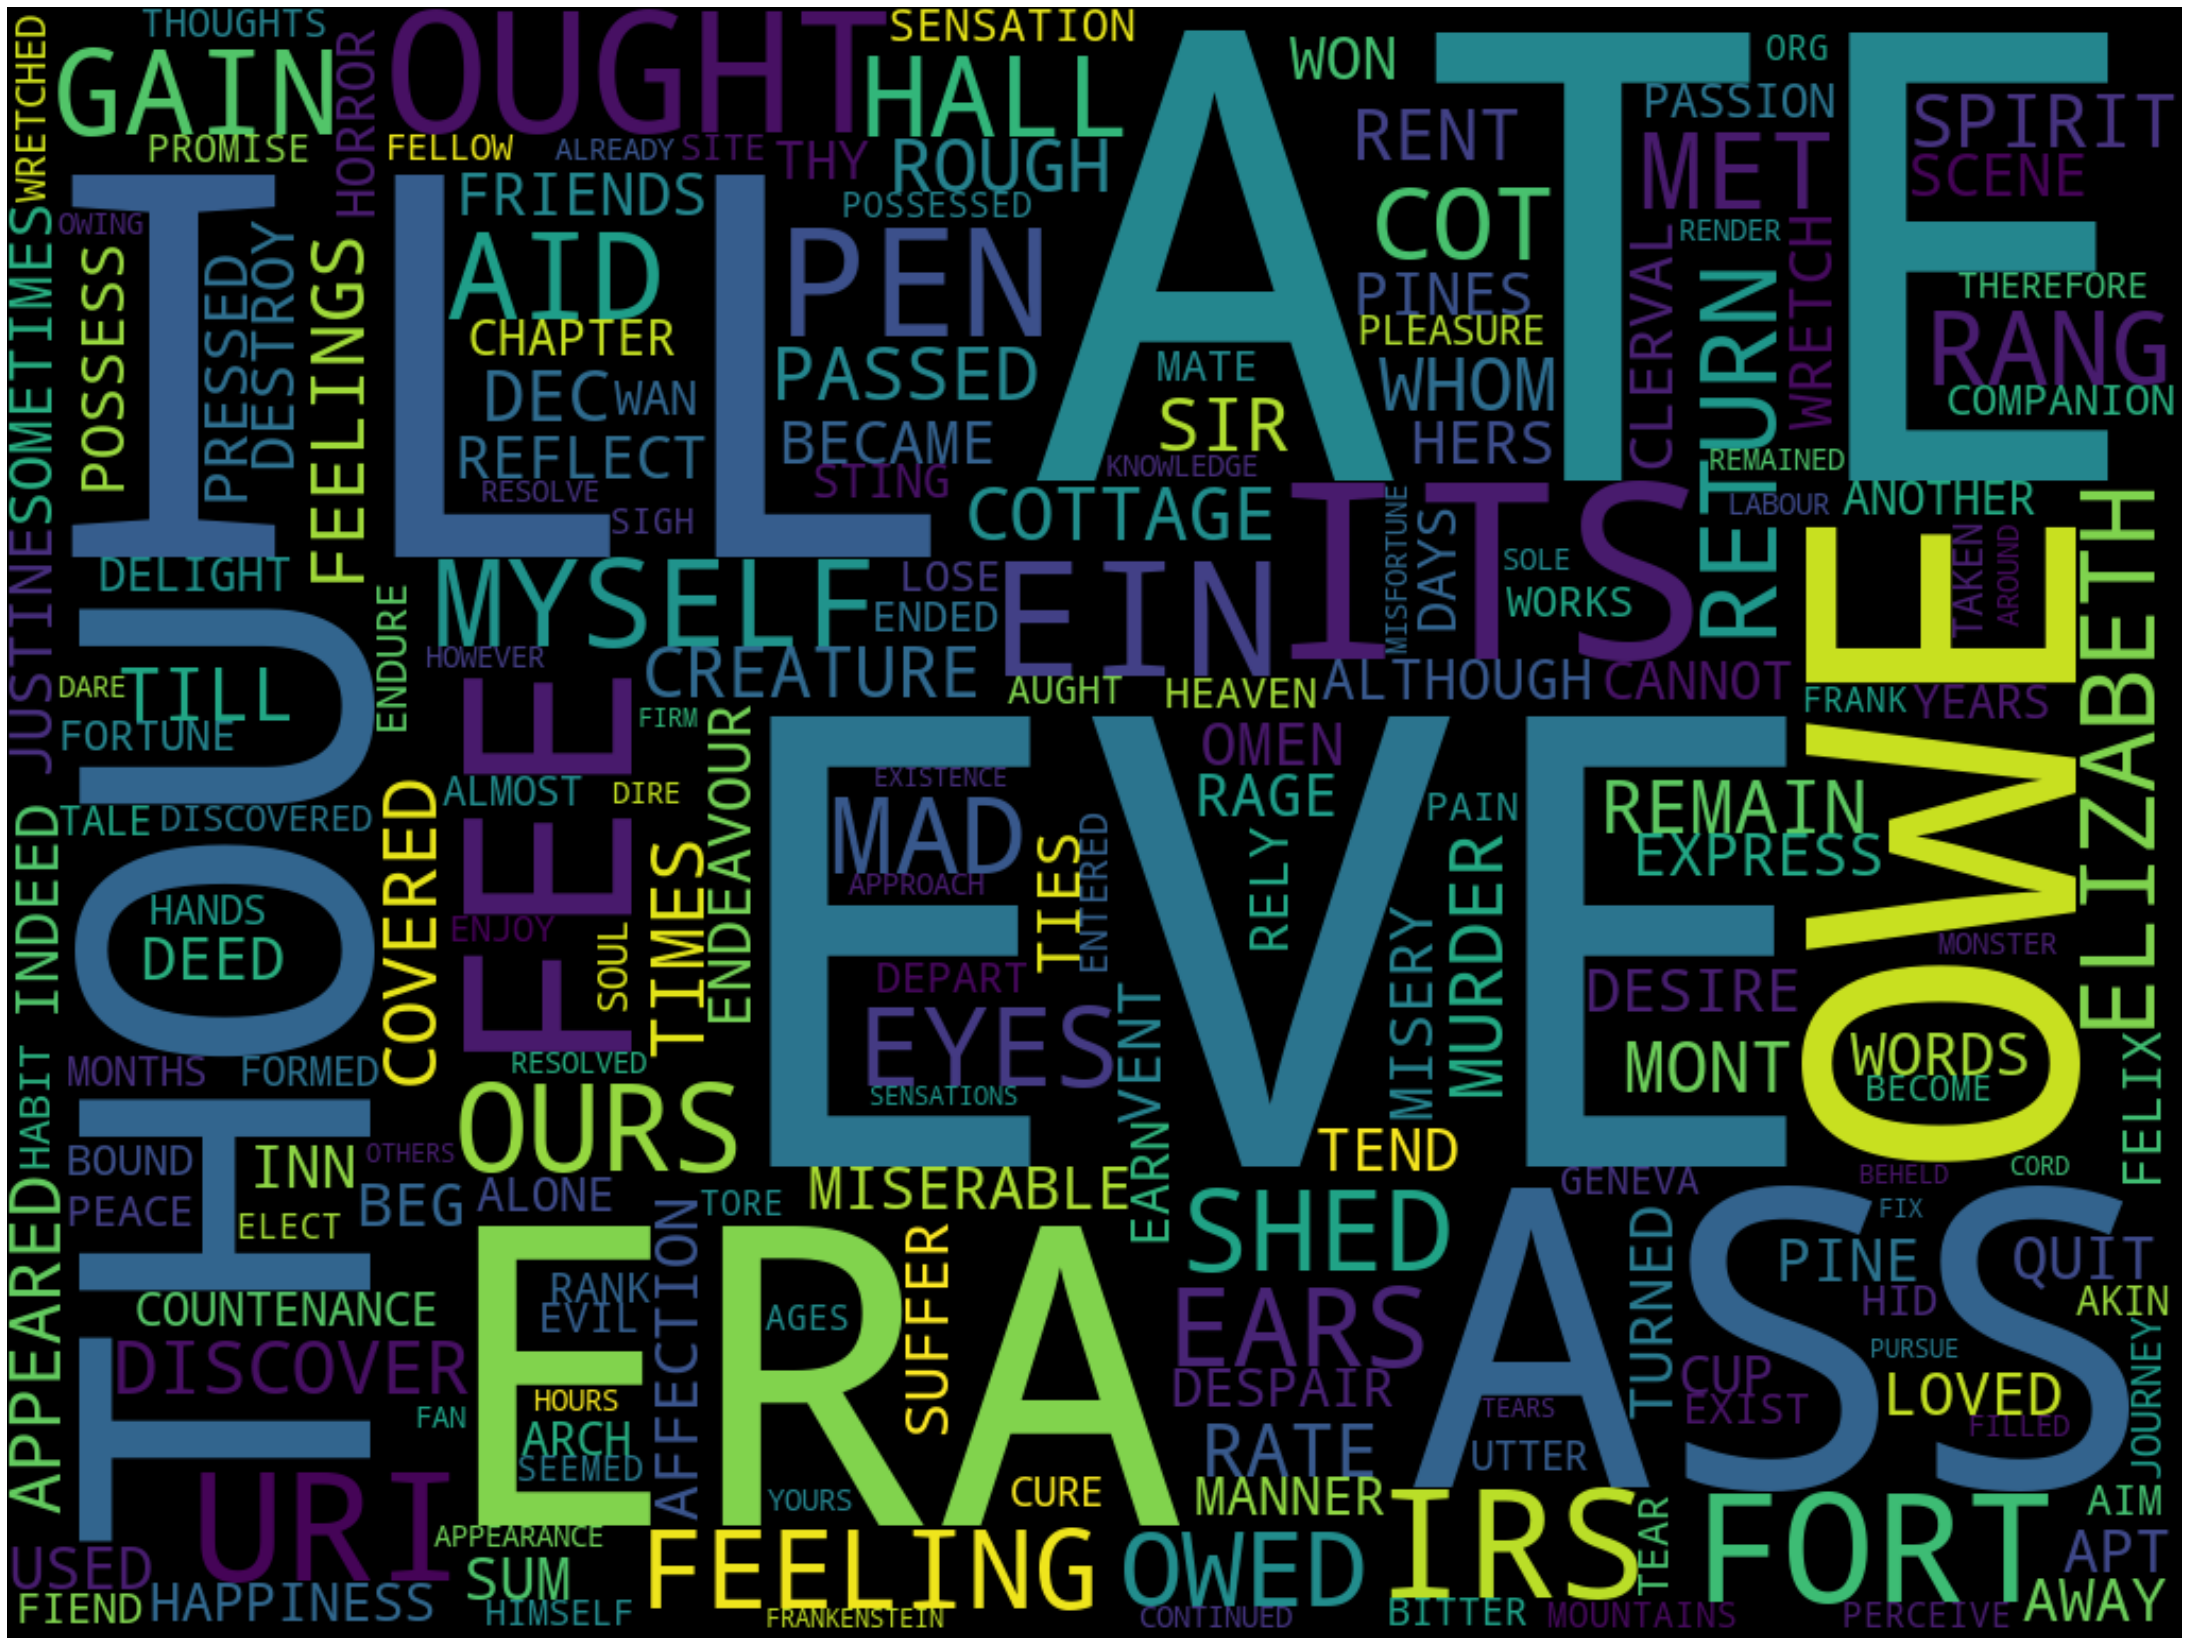

In [19]:
wordcloud = WordCloud(width=1024,\
                      height=768,\
                      relative_scaling=0.5,\
                      normalize_plurals=True).generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()